In [2]:
import numpy as np
import torch
from scipy.interpolate import griddata
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random
from preprocess import *
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# fix random seed
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)      
torch.cuda.manual_seed(0)
data_list = load_data()

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

input_dim = 62*5

class MLPClassifier(nn.Module):
    def __init__(self, input_dim=input_dim, hidden_dim1=256, hidden_dim2=128, num_classes=3):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, num_classes)
        self.dropout = nn.Dropout(p=0.3)
        self.bn1 = nn.BatchNorm1d(hidden_dim1)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.fc3(x)
        return x


In [10]:
batch_size = 32
clf_epoch = 20

clf_acc_list = []

# for i in [2]:
for i in range(12):

    X_train, Y_train, X_test, Y_test = merge_data(data_list, i)

    clf = MLPClassifier().to(device)
    optimizer = torch.optim.Adam(clf.parameters(), lr=1e-3, weight_decay=1e-4)
    criterion = nn.CrossEntropyLoss()
    
    train_dataset = SeedDataset(X_train, torch.tensor(Y_train,dtype=torch.long), augment=False)
    train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
    test_dataset = SeedDataset(X_test, torch.tensor(Y_test,dtype=torch.long), augment=False)
    test_loader = DataLoader(test_dataset,batch_size=batch_size,shuffle=True)

    print("Feature shape from AE:", X_train.shape)

    for epoch in range(clf_epoch):
        clf.train()

        correct_train = 0
        total_train = 0

        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            out = clf(xb)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()

            pred = out.argmax(dim=1)
            correct_train += (pred == yb).sum().item()
            total_train += yb.size(0)

        train_acc = correct_train / total_train

        clf.eval()
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for xb, yb in test_loader:
                xb, yb = xb.to(device), yb.to(device)
                out = clf(xb)
                loss = criterion(out, yb)

                pred = out.argmax(dim=1)
                correct_test += (pred == yb).sum().item()
                total_test += yb.size(0)

        test_acc = correct_test / total_test

        print(f"Epoch {epoch+1}/{clf_epoch}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")
        if epoch == clf_epoch - 1: clf_acc_list.append(test_acc)



Feature shape from AE: (27786, 62, 5)


/mnt/c/users/ValenciaLiu/Desktop/CS3319/HW2/preprocess.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_i = torch.tensor(Y_i, dtype=torch.long)


Epoch 1/20, Train Acc: 0.8658, Test Acc: 0.3317
Epoch 2/20, Train Acc: 0.9387, Test Acc: 0.3317
Epoch 3/20, Train Acc: 0.9626, Test Acc: 0.3317
Epoch 4/20, Train Acc: 0.9723, Test Acc: 0.3317
Epoch 5/20, Train Acc: 0.9778, Test Acc: 0.3317
Epoch 6/20, Train Acc: 0.9804, Test Acc: 0.3317
Epoch 7/20, Train Acc: 0.9826, Test Acc: 0.3317
Epoch 8/20, Train Acc: 0.9830, Test Acc: 0.3317
Epoch 9/20, Train Acc: 0.9863, Test Acc: 0.3317
Epoch 10/20, Train Acc: 0.9866, Test Acc: 0.3317
Epoch 11/20, Train Acc: 0.9877, Test Acc: 0.3317
Epoch 12/20, Train Acc: 0.9865, Test Acc: 0.3317
Epoch 13/20, Train Acc: 0.9886, Test Acc: 0.3317
Epoch 14/20, Train Acc: 0.9892, Test Acc: 0.3317
Epoch 15/20, Train Acc: 0.9890, Test Acc: 0.3317
Epoch 16/20, Train Acc: 0.9904, Test Acc: 0.3317
Epoch 17/20, Train Acc: 0.9901, Test Acc: 0.3317
Epoch 18/20, Train Acc: 0.9914, Test Acc: 0.3317
Epoch 19/20, Train Acc: 0.9892, Test Acc: 0.3317
Epoch 20/20, Train Acc: 0.9924, Test Acc: 0.3317
Feature shape from AE: (27786

/mnt/c/users/ValenciaLiu/Desktop/CS3319/HW2/preprocess.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_i = torch.tensor(Y_i, dtype=torch.long)


Epoch 1/20, Train Acc: 0.8527, Test Acc: 0.3579
Epoch 2/20, Train Acc: 0.9377, Test Acc: 0.4074
Epoch 3/20, Train Acc: 0.9603, Test Acc: 0.4600
Epoch 4/20, Train Acc: 0.9711, Test Acc: 0.3504
Epoch 5/20, Train Acc: 0.9764, Test Acc: 0.4311
Epoch 6/20, Train Acc: 0.9773, Test Acc: 0.4572
Epoch 7/20, Train Acc: 0.9828, Test Acc: 0.4343
Epoch 8/20, Train Acc: 0.9860, Test Acc: 0.4184
Epoch 9/20, Train Acc: 0.9843, Test Acc: 0.4964
Epoch 10/20, Train Acc: 0.9869, Test Acc: 0.3654
Epoch 11/20, Train Acc: 0.9861, Test Acc: 0.4359
Epoch 12/20, Train Acc: 0.9851, Test Acc: 0.3705
Epoch 13/20, Train Acc: 0.9888, Test Acc: 0.4141
Epoch 14/20, Train Acc: 0.9886, Test Acc: 0.4097
Epoch 15/20, Train Acc: 0.9902, Test Acc: 0.3947
Epoch 16/20, Train Acc: 0.9893, Test Acc: 0.3935
Epoch 17/20, Train Acc: 0.9888, Test Acc: 0.4268
Epoch 18/20, Train Acc: 0.9910, Test Acc: 0.3638
Epoch 19/20, Train Acc: 0.9880, Test Acc: 0.4834
Epoch 20/20, Train Acc: 0.9904, Test Acc: 0.4636
Feature shape from AE: (27786

/mnt/c/users/ValenciaLiu/Desktop/CS3319/HW2/preprocess.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_i = torch.tensor(Y_i, dtype=torch.long)


Epoch 1/20, Train Acc: 0.8518, Test Acc: 0.6841
Epoch 2/20, Train Acc: 0.9379, Test Acc: 0.7324
Epoch 3/20, Train Acc: 0.9585, Test Acc: 0.7027
Epoch 4/20, Train Acc: 0.9698, Test Acc: 0.6611
Epoch 5/20, Train Acc: 0.9737, Test Acc: 0.6318
Epoch 6/20, Train Acc: 0.9775, Test Acc: 0.6936
Epoch 7/20, Train Acc: 0.9831, Test Acc: 0.6330
Epoch 8/20, Train Acc: 0.9820, Test Acc: 0.6607
Epoch 9/20, Train Acc: 0.9876, Test Acc: 0.6758
Epoch 10/20, Train Acc: 0.9865, Test Acc: 0.6508
Epoch 11/20, Train Acc: 0.9869, Test Acc: 0.6615
Epoch 12/20, Train Acc: 0.9874, Test Acc: 0.6532
Epoch 13/20, Train Acc: 0.9891, Test Acc: 0.6813
Epoch 14/20, Train Acc: 0.9882, Test Acc: 0.6390
Epoch 15/20, Train Acc: 0.9887, Test Acc: 0.6287
Epoch 16/20, Train Acc: 0.9890, Test Acc: 0.6556
Epoch 17/20, Train Acc: 0.9893, Test Acc: 0.6512
Epoch 18/20, Train Acc: 0.9888, Test Acc: 0.6995
Epoch 19/20, Train Acc: 0.9906, Test Acc: 0.6425
Epoch 20/20, Train Acc: 0.9898, Test Acc: 0.6465
Feature shape from AE: (27786

/mnt/c/users/ValenciaLiu/Desktop/CS3319/HW2/preprocess.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_i = torch.tensor(Y_i, dtype=torch.long)


Epoch 1/20, Train Acc: 0.8583, Test Acc: 0.6643
Epoch 2/20, Train Acc: 0.9428, Test Acc: 0.6492
Epoch 3/20, Train Acc: 0.9613, Test Acc: 0.7070
Epoch 4/20, Train Acc: 0.9709, Test Acc: 0.5732
Epoch 5/20, Train Acc: 0.9749, Test Acc: 0.6453
Epoch 6/20, Train Acc: 0.9815, Test Acc: 0.6227
Epoch 7/20, Train Acc: 0.9840, Test Acc: 0.5812
Epoch 8/20, Train Acc: 0.9838, Test Acc: 0.6184
Epoch 9/20, Train Acc: 0.9849, Test Acc: 0.6314
Epoch 10/20, Train Acc: 0.9853, Test Acc: 0.6774
Epoch 11/20, Train Acc: 0.9870, Test Acc: 0.6437
Epoch 12/20, Train Acc: 0.9868, Test Acc: 0.6053
Epoch 13/20, Train Acc: 0.9878, Test Acc: 0.6611
Epoch 14/20, Train Acc: 0.9883, Test Acc: 0.6746
Epoch 15/20, Train Acc: 0.9884, Test Acc: 0.6085
Epoch 16/20, Train Acc: 0.9905, Test Acc: 0.6144
Epoch 17/20, Train Acc: 0.9893, Test Acc: 0.6528
Epoch 18/20, Train Acc: 0.9901, Test Acc: 0.6033
Epoch 19/20, Train Acc: 0.9903, Test Acc: 0.6936
Epoch 20/20, Train Acc: 0.9901, Test Acc: 0.7308
Feature shape from AE: (27786

/mnt/c/users/ValenciaLiu/Desktop/CS3319/HW2/preprocess.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_i = torch.tensor(Y_i, dtype=torch.long)


Epoch 1/20, Train Acc: 0.8556, Test Acc: 0.5764
Epoch 2/20, Train Acc: 0.9392, Test Acc: 0.5681
Epoch 3/20, Train Acc: 0.9619, Test Acc: 0.6433
Epoch 4/20, Train Acc: 0.9712, Test Acc: 0.6425
Epoch 5/20, Train Acc: 0.9726, Test Acc: 0.5867
Epoch 6/20, Train Acc: 0.9797, Test Acc: 0.5970
Epoch 7/20, Train Acc: 0.9802, Test Acc: 0.6370
Epoch 8/20, Train Acc: 0.9863, Test Acc: 0.6382
Epoch 9/20, Train Acc: 0.9840, Test Acc: 0.6097
Epoch 10/20, Train Acc: 0.9857, Test Acc: 0.6485
Epoch 11/20, Train Acc: 0.9856, Test Acc: 0.6295
Epoch 12/20, Train Acc: 0.9875, Test Acc: 0.6742
Epoch 13/20, Train Acc: 0.9881, Test Acc: 0.5835
Epoch 14/20, Train Acc: 0.9877, Test Acc: 0.6203
Epoch 15/20, Train Acc: 0.9887, Test Acc: 0.6021
Epoch 16/20, Train Acc: 0.9882, Test Acc: 0.5907
Epoch 17/20, Train Acc: 0.9910, Test Acc: 0.5748
Epoch 18/20, Train Acc: 0.9891, Test Acc: 0.5728
Epoch 19/20, Train Acc: 0.9882, Test Acc: 0.6350
Epoch 20/20, Train Acc: 0.9920, Test Acc: 0.5523
Feature shape from AE: (27786

/mnt/c/users/ValenciaLiu/Desktop/CS3319/HW2/preprocess.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_i = torch.tensor(Y_i, dtype=torch.long)


Epoch 1/20, Train Acc: 0.8539, Test Acc: 0.5982
Epoch 2/20, Train Acc: 0.9397, Test Acc: 0.5954
Epoch 3/20, Train Acc: 0.9642, Test Acc: 0.6025
Epoch 4/20, Train Acc: 0.9714, Test Acc: 0.6275
Epoch 5/20, Train Acc: 0.9766, Test Acc: 0.6211
Epoch 6/20, Train Acc: 0.9792, Test Acc: 0.6211
Epoch 7/20, Train Acc: 0.9812, Test Acc: 0.5843
Epoch 8/20, Train Acc: 0.9813, Test Acc: 0.6255
Epoch 9/20, Train Acc: 0.9852, Test Acc: 0.5843
Epoch 10/20, Train Acc: 0.9873, Test Acc: 0.6306
Epoch 11/20, Train Acc: 0.9864, Test Acc: 0.5705
Epoch 12/20, Train Acc: 0.9886, Test Acc: 0.6101
Epoch 13/20, Train Acc: 0.9893, Test Acc: 0.6255
Epoch 14/20, Train Acc: 0.9864, Test Acc: 0.6033
Epoch 15/20, Train Acc: 0.9886, Test Acc: 0.6243
Epoch 16/20, Train Acc: 0.9886, Test Acc: 0.5693
Epoch 17/20, Train Acc: 0.9903, Test Acc: 0.6148
Epoch 18/20, Train Acc: 0.9886, Test Acc: 0.6334
Epoch 19/20, Train Acc: 0.9909, Test Acc: 0.6152
Epoch 20/20, Train Acc: 0.9905, Test Acc: 0.6512
Feature shape from AE: (27786

/mnt/c/users/ValenciaLiu/Desktop/CS3319/HW2/preprocess.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_i = torch.tensor(Y_i, dtype=torch.long)


Epoch 1/20, Train Acc: 0.8556, Test Acc: 0.6006
Epoch 2/20, Train Acc: 0.9413, Test Acc: 0.6659
Epoch 3/20, Train Acc: 0.9624, Test Acc: 0.7110
Epoch 4/20, Train Acc: 0.9748, Test Acc: 0.5689
Epoch 5/20, Train Acc: 0.9774, Test Acc: 0.5329
Epoch 6/20, Train Acc: 0.9800, Test Acc: 0.4842
Epoch 7/20, Train Acc: 0.9846, Test Acc: 0.6247
Epoch 8/20, Train Acc: 0.9815, Test Acc: 0.5040
Epoch 9/20, Train Acc: 0.9865, Test Acc: 0.4410
Epoch 10/20, Train Acc: 0.9862, Test Acc: 0.5907
Epoch 11/20, Train Acc: 0.9881, Test Acc: 0.4984
Epoch 12/20, Train Acc: 0.9882, Test Acc: 0.6417
Epoch 13/20, Train Acc: 0.9890, Test Acc: 0.5515
Epoch 14/20, Train Acc: 0.9892, Test Acc: 0.5598
Epoch 15/20, Train Acc: 0.9893, Test Acc: 0.5479
Epoch 16/20, Train Acc: 0.9900, Test Acc: 0.5756
Epoch 17/20, Train Acc: 0.9901, Test Acc: 0.5899
Epoch 18/20, Train Acc: 0.9896, Test Acc: 0.6097
Epoch 19/20, Train Acc: 0.9900, Test Acc: 0.4830
Epoch 20/20, Train Acc: 0.9905, Test Acc: 0.6247
Feature shape from AE: (27786

/mnt/c/users/ValenciaLiu/Desktop/CS3319/HW2/preprocess.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_i = torch.tensor(Y_i, dtype=torch.long)


Epoch 1/20, Train Acc: 0.8684, Test Acc: 0.5760
Epoch 2/20, Train Acc: 0.9484, Test Acc: 0.6366
Epoch 3/20, Train Acc: 0.9621, Test Acc: 0.4695
Epoch 4/20, Train Acc: 0.9735, Test Acc: 0.4762
Epoch 5/20, Train Acc: 0.9777, Test Acc: 0.5689
Epoch 6/20, Train Acc: 0.9797, Test Acc: 0.5962
Epoch 7/20, Train Acc: 0.9844, Test Acc: 0.5823
Epoch 8/20, Train Acc: 0.9835, Test Acc: 0.5277
Epoch 9/20, Train Acc: 0.9863, Test Acc: 0.5566
Epoch 10/20, Train Acc: 0.9861, Test Acc: 0.6105
Epoch 11/20, Train Acc: 0.9883, Test Acc: 0.5610
Epoch 12/20, Train Acc: 0.9896, Test Acc: 0.4956
Epoch 13/20, Train Acc: 0.9884, Test Acc: 0.5986
Epoch 14/20, Train Acc: 0.9887, Test Acc: 0.5356
Epoch 15/20, Train Acc: 0.9886, Test Acc: 0.6599
Epoch 16/20, Train Acc: 0.9919, Test Acc: 0.6473
Epoch 17/20, Train Acc: 0.9882, Test Acc: 0.5724
Epoch 18/20, Train Acc: 0.9908, Test Acc: 0.5669
Epoch 19/20, Train Acc: 0.9916, Test Acc: 0.6006
Epoch 20/20, Train Acc: 0.9907, Test Acc: 0.5962
Feature shape from AE: (27786

/mnt/c/users/ValenciaLiu/Desktop/CS3319/HW2/preprocess.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_i = torch.tensor(Y_i, dtype=torch.long)


Epoch 1/20, Train Acc: 0.8588, Test Acc: 0.6758
Epoch 2/20, Train Acc: 0.9396, Test Acc: 0.7458
Epoch 3/20, Train Acc: 0.9610, Test Acc: 0.7276
Epoch 4/20, Train Acc: 0.9718, Test Acc: 0.6544
Epoch 5/20, Train Acc: 0.9761, Test Acc: 0.7051
Epoch 6/20, Train Acc: 0.9777, Test Acc: 0.7546
Epoch 7/20, Train Acc: 0.9811, Test Acc: 0.5511
Epoch 8/20, Train Acc: 0.9833, Test Acc: 0.6382
Epoch 9/20, Train Acc: 0.9833, Test Acc: 0.6694
Epoch 10/20, Train Acc: 0.9842, Test Acc: 0.7015
Epoch 11/20, Train Acc: 0.9870, Test Acc: 0.7447
Epoch 12/20, Train Acc: 0.9874, Test Acc: 0.7344
Epoch 13/20, Train Acc: 0.9863, Test Acc: 0.6457
Epoch 14/20, Train Acc: 0.9879, Test Acc: 0.6362
Epoch 15/20, Train Acc: 0.9881, Test Acc: 0.6884
Epoch 16/20, Train Acc: 0.9890, Test Acc: 0.7098
Epoch 17/20, Train Acc: 0.9883, Test Acc: 0.6706
Epoch 18/20, Train Acc: 0.9889, Test Acc: 0.6797
Epoch 19/20, Train Acc: 0.9918, Test Acc: 0.6544
Epoch 20/20, Train Acc: 0.9905, Test Acc: 0.6738
Feature shape from AE: (27786

/mnt/c/users/ValenciaLiu/Desktop/CS3319/HW2/preprocess.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_i = torch.tensor(Y_i, dtype=torch.long)


Epoch 1/20, Train Acc: 0.8672, Test Acc: 0.4014
Epoch 2/20, Train Acc: 0.9480, Test Acc: 0.4236
Epoch 3/20, Train Acc: 0.9634, Test Acc: 0.4375
Epoch 4/20, Train Acc: 0.9747, Test Acc: 0.4454
Epoch 5/20, Train Acc: 0.9771, Test Acc: 0.4549
Epoch 6/20, Train Acc: 0.9795, Test Acc: 0.4169
Epoch 7/20, Train Acc: 0.9840, Test Acc: 0.3626
Epoch 8/20, Train Acc: 0.9838, Test Acc: 0.4232
Epoch 9/20, Train Acc: 0.9848, Test Acc: 0.4505
Epoch 10/20, Train Acc: 0.9870, Test Acc: 0.4533
Epoch 11/20, Train Acc: 0.9868, Test Acc: 0.4220
Epoch 12/20, Train Acc: 0.9902, Test Acc: 0.4628
Epoch 13/20, Train Acc: 0.9901, Test Acc: 0.4818
Epoch 14/20, Train Acc: 0.9886, Test Acc: 0.4937
Epoch 15/20, Train Acc: 0.9902, Test Acc: 0.4537
Epoch 16/20, Train Acc: 0.9898, Test Acc: 0.3808
Epoch 17/20, Train Acc: 0.9904, Test Acc: 0.4727
Epoch 18/20, Train Acc: 0.9891, Test Acc: 0.4192
Epoch 19/20, Train Acc: 0.9919, Test Acc: 0.4675
Epoch 20/20, Train Acc: 0.9892, Test Acc: 0.4893
Feature shape from AE: (27786

/mnt/c/users/ValenciaLiu/Desktop/CS3319/HW2/preprocess.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_i = torch.tensor(Y_i, dtype=torch.long)


Epoch 1/20, Train Acc: 0.8659, Test Acc: 0.4256
Epoch 2/20, Train Acc: 0.9398, Test Acc: 0.3919
Epoch 3/20, Train Acc: 0.9601, Test Acc: 0.4327
Epoch 4/20, Train Acc: 0.9696, Test Acc: 0.3935
Epoch 5/20, Train Acc: 0.9773, Test Acc: 0.4165
Epoch 6/20, Train Acc: 0.9805, Test Acc: 0.3979
Epoch 7/20, Train Acc: 0.9832, Test Acc: 0.4272
Epoch 8/20, Train Acc: 0.9817, Test Acc: 0.3967
Epoch 9/20, Train Acc: 0.9851, Test Acc: 0.4283
Epoch 10/20, Train Acc: 0.9855, Test Acc: 0.3797
Epoch 11/20, Train Acc: 0.9865, Test Acc: 0.3987
Epoch 12/20, Train Acc: 0.9902, Test Acc: 0.3686
Epoch 13/20, Train Acc: 0.9882, Test Acc: 0.4327
Epoch 14/20, Train Acc: 0.9877, Test Acc: 0.4260
Epoch 15/20, Train Acc: 0.9905, Test Acc: 0.3895
Epoch 16/20, Train Acc: 0.9881, Test Acc: 0.4248
Epoch 17/20, Train Acc: 0.9875, Test Acc: 0.3488
Epoch 18/20, Train Acc: 0.9913, Test Acc: 0.4173
Epoch 19/20, Train Acc: 0.9889, Test Acc: 0.4177
Epoch 20/20, Train Acc: 0.9899, Test Acc: 0.4113
Feature shape from AE: (27786

/mnt/c/users/ValenciaLiu/Desktop/CS3319/HW2/preprocess.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_i = torch.tensor(Y_i, dtype=torch.long)


Epoch 1/20, Train Acc: 0.8578, Test Acc: 0.8001
Epoch 2/20, Train Acc: 0.9391, Test Acc: 0.7458
Epoch 3/20, Train Acc: 0.9593, Test Acc: 0.7549
Epoch 4/20, Train Acc: 0.9716, Test Acc: 0.7534
Epoch 5/20, Train Acc: 0.9768, Test Acc: 0.7352
Epoch 6/20, Train Acc: 0.9790, Test Acc: 0.7035
Epoch 7/20, Train Acc: 0.9813, Test Acc: 0.7427
Epoch 8/20, Train Acc: 0.9840, Test Acc: 0.7684
Epoch 9/20, Train Acc: 0.9845, Test Acc: 0.6813
Epoch 10/20, Train Acc: 0.9864, Test Acc: 0.6896
Epoch 11/20, Train Acc: 0.9871, Test Acc: 0.6797
Epoch 12/20, Train Acc: 0.9882, Test Acc: 0.6694
Epoch 13/20, Train Acc: 0.9892, Test Acc: 0.6825
Epoch 14/20, Train Acc: 0.9882, Test Acc: 0.6057
Epoch 15/20, Train Acc: 0.9896, Test Acc: 0.6006
Epoch 16/20, Train Acc: 0.9884, Test Acc: 0.7292
Epoch 17/20, Train Acc: 0.9896, Test Acc: 0.5978
Epoch 18/20, Train Acc: 0.9917, Test Acc: 0.6283
Epoch 19/20, Train Acc: 0.9901, Test Acc: 0.6449
Epoch 20/20, Train Acc: 0.9904, Test Acc: 0.6599


[0.33174980205859067, 0.46357878068091846, 0.6464766429136976, 0.730799683293745, 0.5522565320665083, 0.6512272367379256, 0.6247030878859857, 0.5961995249406176, 0.6737925574030087, 0.48931116389548696, 0.41132224861441014, 0.6599366587490103]
[0.33174980205859067, 0.46357878068091846, 0.6464766429136976, 0.730799683293745, 0.5522565320665083, 0.6512272367379256, 0.6247030878859857, 0.5961995249406176, 0.6737925574030087, 0.48931116389548696, 0.41132224861441014, 0.6599366587490103]
LOSO Mean Accuracy: 0.5693, Std: 0.1158


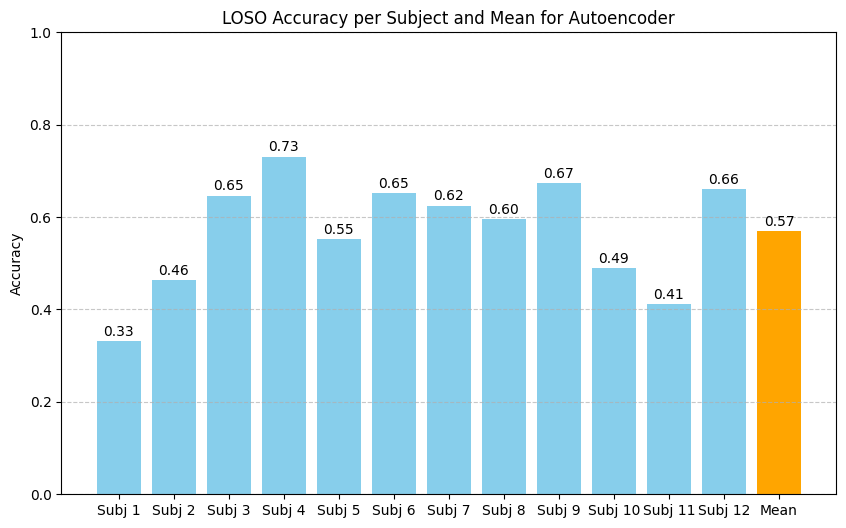

In [11]:
print(clf_acc_list)

print(clf_acc_list)
mean_acc = np.mean(clf_acc_list)
std_acc = np.std(clf_acc_list)
print(f"LOSO Mean Accuracy: {mean_acc:.4f}, Std: {std_acc:.4f}")

x_labels = [f"Subj {i}" for i in range(1, 13)] + ["Mean"]
# 对应柱子高度
y_values = clf_acc_list + [mean_acc]

# 绘制柱状图
plt.figure(figsize=(10,6))
bars = plt.bar(x_labels, y_values, color=['skyblue']*12 + ['orange'])

# 在柱子上显示数值
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f"{height:.2f}", ha='center', va='bottom')

plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("LOSO Accuracy per Subject and Mean for Autoencoder")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_acc_list = []

# for i in [2]:
for i in range(12):

    X_train, Y_train, X_test, Y_test = merge_data(data_list, i)

    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)
    
    lda = LinearDiscriminantAnalysis(n_components=2)
    X_train_lda = lda.fit_transform(X_train, Y_train)
    X_test_lda = lda.transform(X_test)

    clf = MLPClassifier(input_dim=2, hidden_dim1=32, hidden_dim2=16).to(device)
    optimizer = torch.optim.Adam(clf.parameters(), lr=1e-3, weight_decay=1e-4)
    criterion = nn.CrossEntropyLoss()
    
    train_dataset = SeedDataset(X_train_lda, torch.tensor(Y_train,dtype=torch.long), augment=False)
    train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
    test_dataset = SeedDataset(X_test_lda, torch.tensor(Y_test,dtype=torch.long), augment=False)
    test_loader = DataLoader(test_dataset,batch_size=batch_size,shuffle=True)

    print("Feature shape from AE:", X_train.shape)

    for epoch in range(clf_epoch):
        clf.train()

        correct_train = 0
        total_train = 0

        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            out = clf(xb)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()

            pred = out.argmax(dim=1)
            correct_train += (pred == yb).sum().item()
            total_train += yb.size(0)

        train_acc = correct_train / total_train

        clf.eval()
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for xb, yb in test_loader:
                xb, yb = xb.to(device), yb.to(device)
                out = clf(xb)
                loss = criterion(out, yb)

                pred = out.argmax(dim=1)
                correct_test += (pred == yb).sum().item()
                total_test += yb.size(0)

        test_acc = correct_test / total_test

        print(f"Epoch {epoch+1}/{clf_epoch}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")
        if epoch == clf_epoch - 1: clf_acc_list.append(test_acc)



Feature shape from AE: (27786, 310)


/mnt/c/users/ValenciaLiu/Desktop/CS3319/HW2/preprocess.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_i = torch.tensor(Y_i, dtype=torch.long)


Epoch 1/20, Train Acc: 0.9531, Test Acc: 0.3365
Epoch 2/20, Train Acc: 0.9802, Test Acc: 0.3365
Epoch 3/20, Train Acc: 0.9830, Test Acc: 0.3365
Epoch 4/20, Train Acc: 0.9829, Test Acc: 0.3365
Epoch 5/20, Train Acc: 0.9830, Test Acc: 0.3365
Epoch 6/20, Train Acc: 0.9842, Test Acc: 0.3365
Epoch 7/20, Train Acc: 0.9837, Test Acc: 0.3365
Epoch 8/20, Train Acc: 0.9842, Test Acc: 0.3365
Epoch 9/20, Train Acc: 0.9846, Test Acc: 0.3365
Epoch 10/20, Train Acc: 0.9841, Test Acc: 0.3365
Epoch 11/20, Train Acc: 0.9836, Test Acc: 0.3365
Epoch 12/20, Train Acc: 0.9852, Test Acc: 0.3365
Epoch 13/20, Train Acc: 0.9850, Test Acc: 0.3365
Epoch 14/20, Train Acc: 0.9857, Test Acc: 0.3365
Epoch 15/20, Train Acc: 0.9852, Test Acc: 0.3365
Epoch 16/20, Train Acc: 0.9847, Test Acc: 0.3274
Epoch 17/20, Train Acc: 0.9851, Test Acc: 0.3171
Epoch 18/20, Train Acc: 0.9841, Test Acc: 0.3167
Epoch 19/20, Train Acc: 0.9863, Test Acc: 0.3131
Epoch 20/20, Train Acc: 0.9849, Test Acc: 0.3365
Feature shape from AE: (27786

/mnt/c/users/ValenciaLiu/Desktop/CS3319/HW2/preprocess.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_i = torch.tensor(Y_i, dtype=torch.long)


Epoch 1/20, Train Acc: 0.9498, Test Acc: 0.4105
Epoch 2/20, Train Acc: 0.9763, Test Acc: 0.4220
Epoch 3/20, Train Acc: 0.9783, Test Acc: 0.4331
Epoch 4/20, Train Acc: 0.9776, Test Acc: 0.4208
Epoch 5/20, Train Acc: 0.9795, Test Acc: 0.4481
Epoch 6/20, Train Acc: 0.9803, Test Acc: 0.4351
Epoch 7/20, Train Acc: 0.9809, Test Acc: 0.4466
Epoch 8/20, Train Acc: 0.9798, Test Acc: 0.4355
Epoch 9/20, Train Acc: 0.9798, Test Acc: 0.4382
Epoch 10/20, Train Acc: 0.9788, Test Acc: 0.4553
Epoch 11/20, Train Acc: 0.9796, Test Acc: 0.4442
Epoch 12/20, Train Acc: 0.9807, Test Acc: 0.4331
Epoch 13/20, Train Acc: 0.9808, Test Acc: 0.4208
Epoch 14/20, Train Acc: 0.9809, Test Acc: 0.4454
Epoch 15/20, Train Acc: 0.9803, Test Acc: 0.4386
Epoch 16/20, Train Acc: 0.9820, Test Acc: 0.4371
Epoch 17/20, Train Acc: 0.9822, Test Acc: 0.4339
Epoch 18/20, Train Acc: 0.9821, Test Acc: 0.4394
Epoch 19/20, Train Acc: 0.9822, Test Acc: 0.4188
Epoch 20/20, Train Acc: 0.9828, Test Acc: 0.4390
Feature shape from AE: (27786

/mnt/c/users/ValenciaLiu/Desktop/CS3319/HW2/preprocess.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_i = torch.tensor(Y_i, dtype=torch.long)


Epoch 1/20, Train Acc: 0.9595, Test Acc: 0.5467
Epoch 2/20, Train Acc: 0.9809, Test Acc: 0.5724
Epoch 3/20, Train Acc: 0.9802, Test Acc: 0.5408
Epoch 4/20, Train Acc: 0.9823, Test Acc: 0.5273
Epoch 5/20, Train Acc: 0.9833, Test Acc: 0.5154
Epoch 6/20, Train Acc: 0.9831, Test Acc: 0.5210
Epoch 7/20, Train Acc: 0.9829, Test Acc: 0.5432
Epoch 8/20, Train Acc: 0.9830, Test Acc: 0.5705
Epoch 9/20, Train Acc: 0.9824, Test Acc: 0.5127
Epoch 10/20, Train Acc: 0.9831, Test Acc: 0.5154
Epoch 11/20, Train Acc: 0.9855, Test Acc: 0.5154
Epoch 12/20, Train Acc: 0.9830, Test Acc: 0.5297
Epoch 13/20, Train Acc: 0.9831, Test Acc: 0.5412
Epoch 14/20, Train Acc: 0.9825, Test Acc: 0.5657
Epoch 15/20, Train Acc: 0.9846, Test Acc: 0.5372
Epoch 16/20, Train Acc: 0.9842, Test Acc: 0.5724
Epoch 17/20, Train Acc: 0.9846, Test Acc: 0.5372
Epoch 18/20, Train Acc: 0.9845, Test Acc: 0.5467
Epoch 19/20, Train Acc: 0.9855, Test Acc: 0.5570
Epoch 20/20, Train Acc: 0.9850, Test Acc: 0.5760
Feature shape from AE: (27786

/mnt/c/users/ValenciaLiu/Desktop/CS3319/HW2/preprocess.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_i = torch.tensor(Y_i, dtype=torch.long)


Epoch 1/20, Train Acc: 0.9553, Test Acc: 0.5249
Epoch 2/20, Train Acc: 0.9793, Test Acc: 0.5938
Epoch 3/20, Train Acc: 0.9801, Test Acc: 0.5653
Epoch 4/20, Train Acc: 0.9810, Test Acc: 0.5740
Epoch 5/20, Train Acc: 0.9805, Test Acc: 0.6097
Epoch 6/20, Train Acc: 0.9797, Test Acc: 0.5657
Epoch 7/20, Train Acc: 0.9799, Test Acc: 0.6037
Epoch 8/20, Train Acc: 0.9814, Test Acc: 0.5823
Epoch 9/20, Train Acc: 0.9793, Test Acc: 0.6093
Epoch 10/20, Train Acc: 0.9815, Test Acc: 0.5990
Epoch 11/20, Train Acc: 0.9815, Test Acc: 0.6057
Epoch 12/20, Train Acc: 0.9814, Test Acc: 0.5713
Epoch 13/20, Train Acc: 0.9822, Test Acc: 0.6140
Epoch 14/20, Train Acc: 0.9812, Test Acc: 0.6112
Epoch 15/20, Train Acc: 0.9810, Test Acc: 0.5879
Epoch 16/20, Train Acc: 0.9821, Test Acc: 0.6053
Epoch 17/20, Train Acc: 0.9812, Test Acc: 0.6073
Epoch 18/20, Train Acc: 0.9819, Test Acc: 0.5875
Epoch 19/20, Train Acc: 0.9822, Test Acc: 0.5954
Epoch 20/20, Train Acc: 0.9829, Test Acc: 0.5879
Feature shape from AE: (27786

/mnt/c/users/ValenciaLiu/Desktop/CS3319/HW2/preprocess.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_i = torch.tensor(Y_i, dtype=torch.long)


Epoch 1/20, Train Acc: 0.9511, Test Acc: 0.4830
Epoch 2/20, Train Acc: 0.9802, Test Acc: 0.5241
Epoch 3/20, Train Acc: 0.9825, Test Acc: 0.5198
Epoch 4/20, Train Acc: 0.9830, Test Acc: 0.5249
Epoch 5/20, Train Acc: 0.9828, Test Acc: 0.5277
Epoch 6/20, Train Acc: 0.9821, Test Acc: 0.5178
Epoch 7/20, Train Acc: 0.9832, Test Acc: 0.5174
Epoch 8/20, Train Acc: 0.9837, Test Acc: 0.5206
Epoch 9/20, Train Acc: 0.9840, Test Acc: 0.5241
Epoch 10/20, Train Acc: 0.9838, Test Acc: 0.4901
Epoch 11/20, Train Acc: 0.9845, Test Acc: 0.4996
Epoch 12/20, Train Acc: 0.9846, Test Acc: 0.5154
Epoch 13/20, Train Acc: 0.9844, Test Acc: 0.5222
Epoch 14/20, Train Acc: 0.9830, Test Acc: 0.4897
Epoch 15/20, Train Acc: 0.9848, Test Acc: 0.5135
Epoch 16/20, Train Acc: 0.9855, Test Acc: 0.5016
Epoch 17/20, Train Acc: 0.9856, Test Acc: 0.5146
Epoch 18/20, Train Acc: 0.9851, Test Acc: 0.4988
Epoch 19/20, Train Acc: 0.9864, Test Acc: 0.5135
Epoch 20/20, Train Acc: 0.9863, Test Acc: 0.5230
Feature shape from AE: (27786

/mnt/c/users/ValenciaLiu/Desktop/CS3319/HW2/preprocess.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_i = torch.tensor(Y_i, dtype=torch.long)


Epoch 1/20, Train Acc: 0.9526, Test Acc: 0.4232
Epoch 2/20, Train Acc: 0.9753, Test Acc: 0.4470
Epoch 3/20, Train Acc: 0.9785, Test Acc: 0.4414
Epoch 4/20, Train Acc: 0.9784, Test Acc: 0.4679
Epoch 5/20, Train Acc: 0.9788, Test Acc: 0.4331
Epoch 6/20, Train Acc: 0.9775, Test Acc: 0.4299
Epoch 7/20, Train Acc: 0.9779, Test Acc: 0.4394
Epoch 8/20, Train Acc: 0.9780, Test Acc: 0.4454
Epoch 9/20, Train Acc: 0.9780, Test Acc: 0.4533
Epoch 10/20, Train Acc: 0.9770, Test Acc: 0.4561
Epoch 11/20, Train Acc: 0.9792, Test Acc: 0.4442
Epoch 12/20, Train Acc: 0.9775, Test Acc: 0.4446
Epoch 13/20, Train Acc: 0.9778, Test Acc: 0.4557
Epoch 14/20, Train Acc: 0.9786, Test Acc: 0.4557
Epoch 15/20, Train Acc: 0.9789, Test Acc: 0.4458
Epoch 16/20, Train Acc: 0.9791, Test Acc: 0.4232
Epoch 17/20, Train Acc: 0.9779, Test Acc: 0.4541
Epoch 18/20, Train Acc: 0.9795, Test Acc: 0.4509
Epoch 19/20, Train Acc: 0.9804, Test Acc: 0.4588
Epoch 20/20, Train Acc: 0.9806, Test Acc: 0.4636
Feature shape from AE: (27786

/mnt/c/users/ValenciaLiu/Desktop/CS3319/HW2/preprocess.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_i = torch.tensor(Y_i, dtype=torch.long)


Epoch 1/20, Train Acc: 0.9486, Test Acc: 0.3116
Epoch 2/20, Train Acc: 0.9786, Test Acc: 0.3234
Epoch 3/20, Train Acc: 0.9793, Test Acc: 0.3207
Epoch 4/20, Train Acc: 0.9809, Test Acc: 0.3238
Epoch 5/20, Train Acc: 0.9792, Test Acc: 0.3187
Epoch 6/20, Train Acc: 0.9812, Test Acc: 0.3215
Epoch 7/20, Train Acc: 0.9807, Test Acc: 0.3337
Epoch 8/20, Train Acc: 0.9787, Test Acc: 0.3361
Epoch 9/20, Train Acc: 0.9802, Test Acc: 0.3420
Epoch 10/20, Train Acc: 0.9802, Test Acc: 0.3246
Epoch 11/20, Train Acc: 0.9807, Test Acc: 0.3250
Epoch 12/20, Train Acc: 0.9809, Test Acc: 0.3242
Epoch 13/20, Train Acc: 0.9811, Test Acc: 0.3159
Epoch 14/20, Train Acc: 0.9824, Test Acc: 0.3226
Epoch 15/20, Train Acc: 0.9838, Test Acc: 0.3143
Epoch 16/20, Train Acc: 0.9814, Test Acc: 0.3191
Epoch 17/20, Train Acc: 0.9822, Test Acc: 0.3298
Epoch 18/20, Train Acc: 0.9820, Test Acc: 0.3203
Epoch 19/20, Train Acc: 0.9834, Test Acc: 0.3238
Epoch 20/20, Train Acc: 0.9830, Test Acc: 0.3416
Feature shape from AE: (27786

/mnt/c/users/ValenciaLiu/Desktop/CS3319/HW2/preprocess.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_i = torch.tensor(Y_i, dtype=torch.long)


Epoch 1/20, Train Acc: 0.9589, Test Acc: 0.4580
Epoch 2/20, Train Acc: 0.9820, Test Acc: 0.4493
Epoch 3/20, Train Acc: 0.9827, Test Acc: 0.4624
Epoch 4/20, Train Acc: 0.9848, Test Acc: 0.4901
Epoch 5/20, Train Acc: 0.9851, Test Acc: 0.4802
Epoch 6/20, Train Acc: 0.9842, Test Acc: 0.4905
Epoch 7/20, Train Acc: 0.9846, Test Acc: 0.4545
Epoch 8/20, Train Acc: 0.9854, Test Acc: 0.5048
Epoch 9/20, Train Acc: 0.9863, Test Acc: 0.4592
Epoch 10/20, Train Acc: 0.9843, Test Acc: 0.4576
Epoch 11/20, Train Acc: 0.9867, Test Acc: 0.5182
Epoch 12/20, Train Acc: 0.9860, Test Acc: 0.4561
Epoch 13/20, Train Acc: 0.9843, Test Acc: 0.4501
Epoch 14/20, Train Acc: 0.9858, Test Acc: 0.5238
Epoch 15/20, Train Acc: 0.9867, Test Acc: 0.4774
Epoch 16/20, Train Acc: 0.9870, Test Acc: 0.4727
Epoch 17/20, Train Acc: 0.9863, Test Acc: 0.5218
Epoch 18/20, Train Acc: 0.9877, Test Acc: 0.4667
Epoch 19/20, Train Acc: 0.9882, Test Acc: 0.4810
Epoch 20/20, Train Acc: 0.9880, Test Acc: 0.5051
Feature shape from AE: (27786

/mnt/c/users/ValenciaLiu/Desktop/CS3319/HW2/preprocess.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_i = torch.tensor(Y_i, dtype=torch.long)


Epoch 1/20, Train Acc: 0.9606, Test Acc: 0.5764
Epoch 2/20, Train Acc: 0.9783, Test Acc: 0.6010
Epoch 3/20, Train Acc: 0.9782, Test Acc: 0.5851
Epoch 4/20, Train Acc: 0.9792, Test Acc: 0.5614
Epoch 5/20, Train Acc: 0.9781, Test Acc: 0.5994
Epoch 6/20, Train Acc: 0.9792, Test Acc: 0.5879
Epoch 7/20, Train Acc: 0.9792, Test Acc: 0.5800
Epoch 8/20, Train Acc: 0.9813, Test Acc: 0.5681
Epoch 9/20, Train Acc: 0.9798, Test Acc: 0.5760
Epoch 10/20, Train Acc: 0.9798, Test Acc: 0.5800
Epoch 11/20, Train Acc: 0.9805, Test Acc: 0.5614
Epoch 12/20, Train Acc: 0.9794, Test Acc: 0.5622
Epoch 13/20, Train Acc: 0.9804, Test Acc: 0.5618
Epoch 14/20, Train Acc: 0.9806, Test Acc: 0.5622
Epoch 15/20, Train Acc: 0.9807, Test Acc: 0.5503
Epoch 16/20, Train Acc: 0.9795, Test Acc: 0.5598
Epoch 17/20, Train Acc: 0.9811, Test Acc: 0.5420
Epoch 18/20, Train Acc: 0.9810, Test Acc: 0.5380
Epoch 19/20, Train Acc: 0.9812, Test Acc: 0.5598
Epoch 20/20, Train Acc: 0.9821, Test Acc: 0.5558
Feature shape from AE: (27786

/mnt/c/users/ValenciaLiu/Desktop/CS3319/HW2/preprocess.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_i = torch.tensor(Y_i, dtype=torch.long)


Epoch 1/20, Train Acc: 0.9649, Test Acc: 0.3017
Epoch 2/20, Train Acc: 0.9781, Test Acc: 0.2890
Epoch 3/20, Train Acc: 0.9801, Test Acc: 0.2811
Epoch 4/20, Train Acc: 0.9795, Test Acc: 0.2953
Epoch 5/20, Train Acc: 0.9803, Test Acc: 0.2546
Epoch 6/20, Train Acc: 0.9804, Test Acc: 0.3112
Epoch 7/20, Train Acc: 0.9816, Test Acc: 0.2945
Epoch 8/20, Train Acc: 0.9816, Test Acc: 0.2906
Epoch 9/20, Train Acc: 0.9803, Test Acc: 0.2906
Epoch 10/20, Train Acc: 0.9809, Test Acc: 0.2621
Epoch 11/20, Train Acc: 0.9830, Test Acc: 0.2862
Epoch 12/20, Train Acc: 0.9823, Test Acc: 0.2732
Epoch 13/20, Train Acc: 0.9806, Test Acc: 0.2577
Epoch 14/20, Train Acc: 0.9831, Test Acc: 0.2747
Epoch 15/20, Train Acc: 0.9821, Test Acc: 0.2850
Epoch 16/20, Train Acc: 0.9819, Test Acc: 0.2625
Epoch 17/20, Train Acc: 0.9832, Test Acc: 0.2819
Epoch 18/20, Train Acc: 0.9818, Test Acc: 0.2569
Epoch 19/20, Train Acc: 0.9823, Test Acc: 0.2676
Epoch 20/20, Train Acc: 0.9821, Test Acc: 0.2668
Feature shape from AE: (27786

/mnt/c/users/ValenciaLiu/Desktop/CS3319/HW2/preprocess.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_i = torch.tensor(Y_i, dtype=torch.long)


Epoch 1/20, Train Acc: 0.9563, Test Acc: 0.4371
Epoch 2/20, Train Acc: 0.9798, Test Acc: 0.4414
Epoch 3/20, Train Acc: 0.9815, Test Acc: 0.4458
Epoch 4/20, Train Acc: 0.9805, Test Acc: 0.4477
Epoch 5/20, Train Acc: 0.9830, Test Acc: 0.4485
Epoch 6/20, Train Acc: 0.9824, Test Acc: 0.4588
Epoch 7/20, Train Acc: 0.9825, Test Acc: 0.4537
Epoch 8/20, Train Acc: 0.9821, Test Acc: 0.4545
Epoch 9/20, Train Acc: 0.9821, Test Acc: 0.4521
Epoch 10/20, Train Acc: 0.9812, Test Acc: 0.4798
Epoch 11/20, Train Acc: 0.9818, Test Acc: 0.4723
Epoch 12/20, Train Acc: 0.9824, Test Acc: 0.4576
Epoch 13/20, Train Acc: 0.9823, Test Acc: 0.4660
Epoch 14/20, Train Acc: 0.9823, Test Acc: 0.4628
Epoch 15/20, Train Acc: 0.9829, Test Acc: 0.4778
Epoch 16/20, Train Acc: 0.9833, Test Acc: 0.4770
Epoch 17/20, Train Acc: 0.9832, Test Acc: 0.4873
Epoch 18/20, Train Acc: 0.9836, Test Acc: 0.4806
Epoch 19/20, Train Acc: 0.9821, Test Acc: 0.4786
Epoch 20/20, Train Acc: 0.9825, Test Acc: 0.4628
Feature shape from AE: (27786

/mnt/c/users/ValenciaLiu/Desktop/CS3319/HW2/preprocess.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_i = torch.tensor(Y_i, dtype=torch.long)


Epoch 1/20, Train Acc: 0.9492, Test Acc: 0.5523
Epoch 2/20, Train Acc: 0.9765, Test Acc: 0.5713
Epoch 3/20, Train Acc: 0.9787, Test Acc: 0.5697
Epoch 4/20, Train Acc: 0.9793, Test Acc: 0.6025
Epoch 5/20, Train Acc: 0.9779, Test Acc: 0.5625
Epoch 6/20, Train Acc: 0.9790, Test Acc: 0.5784
Epoch 7/20, Train Acc: 0.9786, Test Acc: 0.5637
Epoch 8/20, Train Acc: 0.9794, Test Acc: 0.5823
Epoch 9/20, Train Acc: 0.9789, Test Acc: 0.5994
Epoch 10/20, Train Acc: 0.9789, Test Acc: 0.5701
Epoch 11/20, Train Acc: 0.9793, Test Acc: 0.5740
Epoch 12/20, Train Acc: 0.9777, Test Acc: 0.5582
Epoch 13/20, Train Acc: 0.9789, Test Acc: 0.5847
Epoch 14/20, Train Acc: 0.9789, Test Acc: 0.5879
Epoch 15/20, Train Acc: 0.9801, Test Acc: 0.5816
Epoch 16/20, Train Acc: 0.9800, Test Acc: 0.5966
Epoch 17/20, Train Acc: 0.9814, Test Acc: 0.5689
Epoch 18/20, Train Acc: 0.9799, Test Acc: 0.5732
Epoch 19/20, Train Acc: 0.9809, Test Acc: 0.5950
Epoch 20/20, Train Acc: 0.9803, Test Acc: 0.5772


12
[0.33650039588281866, 0.43903404592240697, 0.5760095011876485, 0.5878859857482185, 0.5229612034837688, 0.46357878068091846, 0.3416468725257324, 0.5051464766429137, 0.5558194774346793, 0.2668250197941409, 0.4628, 0.5772]
LOSO Mean Accuracy: 0.4696, Std: 0.1019


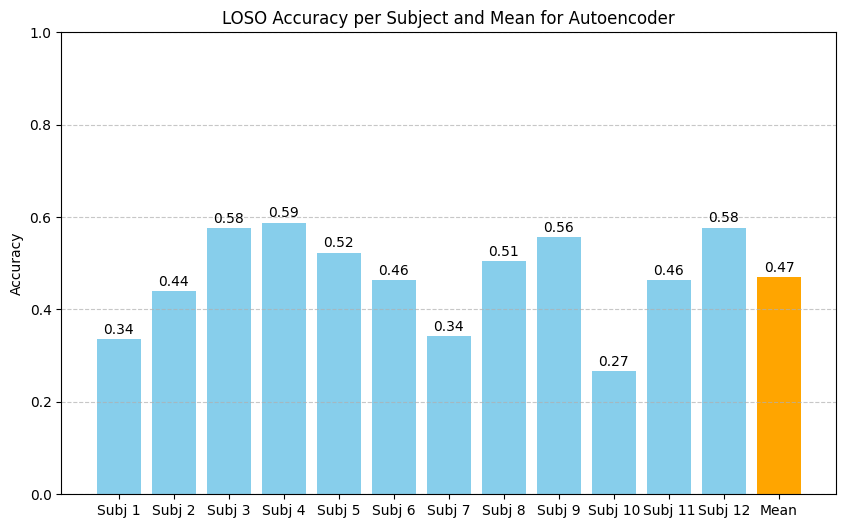

In [20]:
print(len(clf_acc_list))

print(clf_acc_list)
mean_acc = np.mean(clf_acc_list)
std_acc = np.std(clf_acc_list)
print(f"LOSO Mean Accuracy: {mean_acc:.4f}, Std: {std_acc:.4f}")

x_labels = [f"Subj {i}" for i in range(1, 13)] + ["Mean"]
# 对应柱子高度
y_values = clf_acc_list + [mean_acc]

# 绘制柱状图
plt.figure(figsize=(10,6))
bars = plt.bar(x_labels, y_values, color=['skyblue']*12 + ['orange'])

# 在柱子上显示数值
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f"{height:.2f}", ha='center', va='bottom')

plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("LOSO Accuracy per Subject and Mean for Autoencoder")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()